In [1]:
# Import python packages
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
import os

# Check version numbers
print(f'numpy: {np.version.version}')
print(f'pandas: {pd.__version__}')
print(f'scipy: {sp.__version__}')
print(f'scikit-learn: {sk.__version__}')
print(f'seaborn: {sns.__version__}')

numpy: 2.3.2
pandas: 2.3.1
scipy: 1.16.1
scikit-learn: 1.7.1
seaborn: 0.13.2


In [2]:
os.chdir("../data")
print(os.getcwd())

/workspaces/4Geeks_final_project/data


In [3]:
df = pd.read_csv("superstore_final_dataset.csv", encoding='latin1')

df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def preprocess_text(text):
    text = str(text).strip()
    
    text = re.sub(r"<.*?>", " ", text)
    
    text = re.sub(r"\s+", " ", text)
    
    # (keep / and - for dates and codes)
    text = re.sub(r"[^a-zA-Z0-9\s\-/]", "", text)
    
    # Lowercase for consistency
    text = text.lower().strip()
    
    return text

cols_to_clean = ["Order_Date", "Ship_Date","Ship_Mode", "Customer_Name", "Segment", 
                 "Country", "City", "State", "Region",
                 "Category", "Sub_Category"]

for col in cols_to_clean:
    df[col] = df[col].astype(str).apply(preprocess_text)

df = df.drop("Product_Name", axis = 1)

df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True, errors='coerce')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], dayfirst=True, errors='coerce')


df['Order_Date'] = df['Order_Date'].astype("int64") / 1e9
df['Ship_Date'] = df['Ship_Date'].astype("int64") / 1e9

df["Turnaround_Time"] = df["Order_Date"] - df["Ship_Date"]

le = LabelEncoder()
df['Customer_Name_encoded'] = le.fit_transform(df['Customer_Name'])
df['City_encoded'] = le.fit_transform(df['City'])
df['State_encoded'] = le.fit_transform(df['State'])
df['Postal_Code_encoded'] = le.fit_transform(df['Postal_Code'])
df['Product_ID_encoded'] = le.fit_transform(df['Product_ID'])

#df.drop('Product_Name')

# One-hot encode low-cardinality categorical columns
df = pd.get_dummies(df, columns=['Ship_Mode', 'Segment', 'Country', 'Region', 'Category', 'Sub_Category'])

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Customer_ID,Customer_Name,City,State,Postal_Code,Product_ID,Sales,Turnaround_Time,Customer_Name_encoded,City_encoded,State_encoded,Postal_Code_encoded,Product_ID_encoded,Ship_Mode_first class,Ship_Mode_same day,Ship_Mode_second class,Ship_Mode_standard class,Segment_consumer,Segment_corporate,Segment_home office,Country_united states,Region_central,Region_east,Region_south,Region_west,Category_furniture,Category_office supplies,Category_technology,Sub_Category_accessories,Sub_Category_appliances,Sub_Category_art,Sub_Category_binders,Sub_Category_bookcases,Sub_Category_chairs,Sub_Category_copiers,Sub_Category_envelopes,Sub_Category_fasteners,Sub_Category_furnishings,Sub_Category_labels,Sub_Category_machines,Sub_Category_paper,Sub_Category_phones,Sub_Category_storage,Sub_Category_supplies,Sub_Category_tables
0,1,CA-2017-152156,1.510099e+09,1.510358e+09,CG-12520,claire gute,henderson,kentucky,42420.0,FUR-BO-10001798,261.9600,-259200.0,166,194,15,215,12,False,False,True,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,2,CA-2017-152156,1.510099e+09,1.510358e+09,CG-12520,claire gute,henderson,kentucky,42420.0,FUR-CH-10000454,731.9400,-259200.0,166,194,15,215,55,False,False,True,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,3,CA-2017-138688,1.497226e+09,1.497571e+09,DV-13045,darrin van huff,los angeles,california,90036.0,OFF-LA-10000240,14.6200,-345600.0,201,265,3,513,946,False,False,True,False,False,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,4,US-2016-108966,1.476144e+09,1.476749e+09,SO-20335,sean o donnel,fort lauderdale,florida,33311.0,FUR-TA-10000577,957.5775,-604800.0,687,153,8,168,319,False,False,False,True,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,5,US-2016-108966,1.476144e+09,1.476749e+09,SO-20335,sean o donnel,fort lauderdale,florida,33311.0,OFF-ST-10000760,22.3680,-604800.0,687,153,8,168,1316,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [5]:
df = df.drop(columns=["Order_ID", "Customer_ID", "Product_ID","Customer_Name", "City", "State", "Postal_Code", "Ship_Date"]) 

In [6]:
df.to_csv("clean_superstore_dataset.csv", index=False)

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop("Sales", axis = 1)
y = df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.80)

In [8]:
X.head()

,Row_ID,Order_Date,Turnaround_Time,Customer_Name_encoded,City_encoded,State_encoded,Postal_Code_encoded,Product_ID_encoded,Ship_Mode_first class,Ship_Mode_same day,Ship_Mode_second class,Ship_Mode_standard class,Segment_consumer,Segment_corporate,Segment_home office,Country_united states,Region_central,Region_east,Region_south,Region_west,Category_furniture,Category_office supplies,Category_technology,Sub_Category_accessories,Sub_Category_appliances,Sub_Category_art,Sub_Category_binders,Sub_Category_bookcases,Sub_Category_chairs,Sub_Category_copiers,Sub_Category_envelopes,Sub_Category_fasteners,Sub_Category_furnishings,Sub_Category_labels,Sub_Category_machines,Sub_Category_paper,Sub_Category_phones,Sub_Category_storage,Sub_Category_supplies,Sub_Category_tables
0,1,1.510099e+09,-259200.0,166,194,15,215,12,False,False,True,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,2,1.510099e+09,-259200.0,166,194,15,215,55,False,False,True,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,3,1.497226e+09,-345600.0,201,265,3,513,946,False,False,True,False,False,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,4,1.476144e+09,-604800.0,687,153,8,168,319,False,False,False,True,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,5,1.476144e+09,-604800.0,687,153,8,168,1316,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [9]:
y

0         261.9600
1         731.9400
2          14.6200
3         957.5775
4          22.3680
5          48.8600
6           7.2800
7         907.1520
8          18.5040
9         114.9000
10       1706.1840
11        911.4240
12         15.5520
13        407.9760
14         68.8100
15          2.5440
16        665.8800
17         55.5000
18          8.5600
19        213.4800
20         22.7200
21         19.4600
22         60.3400
23         71.3720
24       1044.6300
25         11.6480
26         90.5700
27       3083.4300
28          9.6180
29        124.2000
30          3.2640
31         86.3040
32          6.8580
33         15.7600
34         29.4720
35       1097.5440
36        190.9200
37        113.3280
38        532.3992
39        212.0580
40        371.1680
41        147.1680
42         77.8800
43         95.6160
44         45.9800
45         17.4600
46        211.9600
47         45.0000
48         21.8000
49         38.2200
50         75.1800
51          6.1600
52         8

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b): {model.coef_}")

Intercept (a): 458.8093558431415
Coefficients (b): [ 2.05769341e-03  3.13371402e-08 -1.08373053e-05  4.47397095e-02
  2.43437550e-02  6.10336981e-01 -2.56761326e-01  3.24932094e-02
 -2.25945310e+00 -8.18689583e+00  7.03097561e+00  3.41537316e+00
 -3.07140735e+00 -4.95305402e+00  8.02446123e+00  1.15153398e-09
  4.13893068e+00 -4.87788418e+01 -2.63055676e+01  7.09454787e+01
 -4.14450174e+01 -3.59145569e+02  4.00590586e+02 -7.17183512e+02
  7.32271083e+01 -1.09250896e+02 -1.86488827e+01  6.76841916e+01
  6.78408963e+01  1.31128624e+03 -8.44683268e+01 -1.39183025e+02
 -3.56070257e+02 -1.23045412e+02  3.88289023e+02 -1.04120910e+02
 -5.81801167e+02  9.15477420e+01  5.47970336e+01  1.79100152e+02]


In [12]:
y_pred = model.predict(X_test)
y_pred

array([ 83.26283261,  83.1122041 , 346.22587432, ...,  94.98070287,
       155.71209675, 277.62753228], shape=(1960,))

In [13]:
from sklearn.metrics import mean_squared_error as mse , r2_score

print(f"Mean squared error: {mse(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 548596.2075815259
Coefficient of determination: 0.17923942219302036


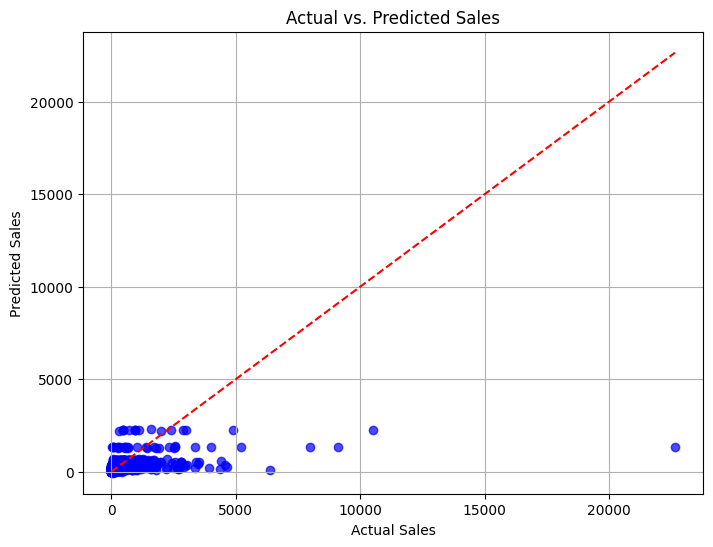

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.grid(True)
plt.show()

In [15]:
residuals = y_test - y_pred

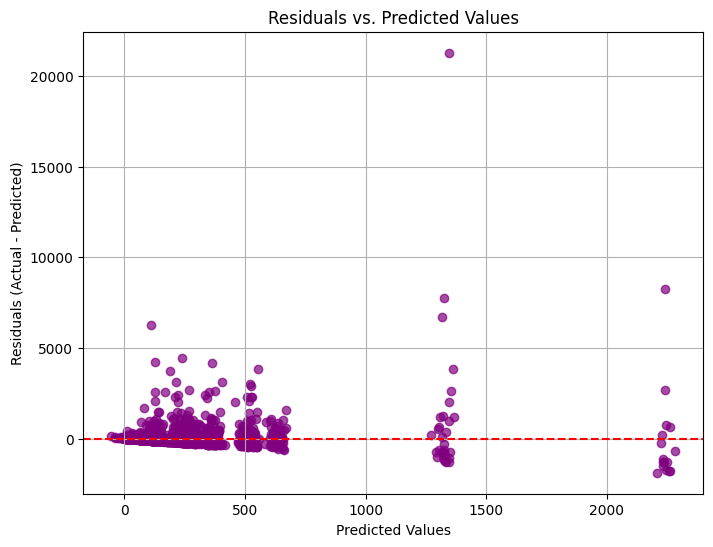

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--')  # reference line at zero
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs. Predicted Values")
plt.grid(True)
plt.show()